3
6.0
Osdf =  [1.49998500e+00 1.44220569e+00 7.59484989e-01 1.59110964e-01
 2.05054296e-02 2.22060386e-03 2.30528414e-04 2.26165335e-05]
Odnc =  [3.99994000e+00 3.77106405e+00 1.44112580e+00 1.38188933e-01
 6.39331954e-03 2.27839878e-04 7.62096198e-06 2.34186666e-07]
Ogdnc =  [2.99994000e+00 2.77327633e+00 7.69089932e-01 3.37550652e-02
 5.60630191e-04 6.57477536e-06 7.08577992e-08 6.82010117e-10]


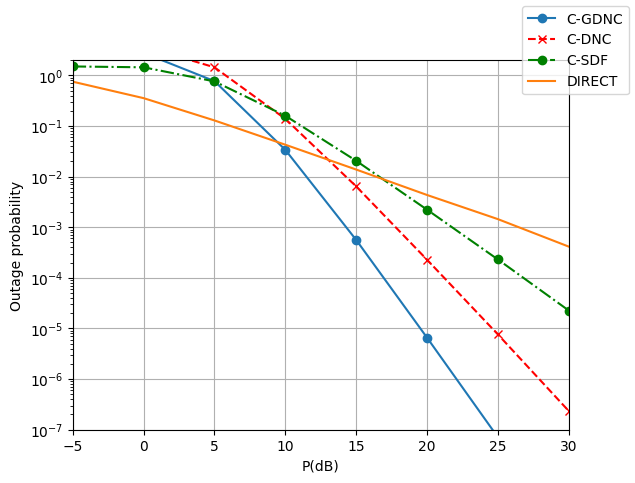

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nakagami


#  C-SDF, C-DNC, C-GDNC Scheme
N=1000000
#distance
d=0.5
#path loss
alpha1=4
# lambda = mean power
media=d**(-alpha1)
# Rs Attempted information
Rs = 3
print(Rs)
# transmission rate
r_sch = 0.5
R_direct = Rs/1
R_sdf = Rs/r_sch
R_dnc = Rs/r_sch
R_gdnc = Rs/r_sch
R_fdgnc = Rs/r_sch
# Noise power
N0=1
count=0
j=0
OP=[]
OP1=[]
OP2=[]
OP3=[]

for j in np.arange(-5,31,5):
    count=0
    plin=10**(j/10)
    r =np.sqrt(media)*nakagami.rvs(1, size=N)
    Prob = np.sum(np.log2(1 + (r**2 * plin / N0)) < R_direct) / N
    Prob1 = np.sum(np.log2(1 + (r**2 * plin / N0)) < R_sdf) / N
    Prob2 = np.sum(np.log2(1 + (r**2 * plin / N0)) < R_dnc) / N
    Prob3 = np.sum(np.log2(1 + (r**2 * plin / N0)) < R_gdnc) / N
    OP = np.append(OP,Prob)
    OP1=np.append(OP1,Prob1)
    OP2=np.append(OP2,Prob2)
    OP3=np.append(OP3,Prob3)

Odirect = OP
print('Odirect = ', Odirect)
Osdf=1.5* OP1**2
print('Osdf = ', Osdf)
Odnc= 4* OP2**3
print('Odnc = ', Odnc)
Ogdnc= 3* OP3**4
print('Ogdnc = ', Ogdnc)

Pdb=np.arange(-5,31,5)
plt.semilogy(Pdb,Ogdnc, marker='o')
plt.semilogy(Pdb,Odnc,'rx--')
plt.semilogy(Pdb,Osdf,'go-.')
plt.semilogy(Pdb,Odirect)
plt.grid()
plt.axis([-5,30,1e-7,2])
plt.xlabel('P(dB)')
plt.ylabel('Outage probability')
plt.figlegend(['C-GDNC','C-DNC','C-SDF', 'DIRECT'])
plt.show()

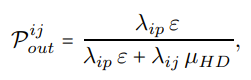

In [28]:
dip = 1
dij = 0.5
v = 4
No = 1
sigmaip = 1
sigmaij = 1
lambdaip = dip**(-v) * sigmaip
lambdaij = dij**(-v) * sigmaij

Rs = 3
Rd = 1
Rsch = 0.5
Rdt = Rs/Rd
R = Rs/Rsch
E = 2**R -1
Ed = 2**Rdt -1
j=0
P12=[]
Pd=[]
for j in np.arange(-5,31,5):
  B=10**(j/10)
  mu_hd = B/No
  Pout = (lambdaip*E)/(lambdaip*E + lambdaij*mu_hd)
  Pod = (lambdaip*Ed)/(lambdaip*Ed + lambdaij*mu_hd)
  P12 =np.append(P12, Pout)
  Pd = np.append(Pd, Pod)

Odirect = Pd
print('Odirect = ', Odirect)
Osdf1=1.5* P12**2
print('Osdf = ', Osdf)
Odnc= 4* P12**3
print('Odnc = ', Odnc)
Ogdnc= 3* P12**4
print('Ogdnc = ', Ogdnc)
print(Osdf1)

Odirect =  [5.80448299e-01 3.04347826e-01 1.21535284e-01 4.19161677e-02
 1.36461705e-02 4.35594275e-03 1.38158506e-03 4.37308677e-04]
Osdf =  [9.53933664e-01 4.61363142e-01 1.19718876e-01 1.83908640e-02
 2.15272156e-03 2.26873601e-04 2.30737955e-05]
Odnc =  [3.17258024e+00 2.02861843e+00 6.82318971e-01 9.01917992e-02
 5.43033098e-03 2.17472773e-04 7.44044735e-06 2.41324637e-07]
Ogdnc =  [2.20254481e+00 1.21331925e+00 2.83807932e-01 1.91101458e-02
 4.50965169e-04 6.17894680e-06 6.86288409e-08 7.09866718e-10]
[1.28526597e+00 9.53933664e-01 4.61363142e-01 1.19718876e-01
 1.83908640e-02 2.15272156e-03 2.26873601e-04 2.30737955e-05]


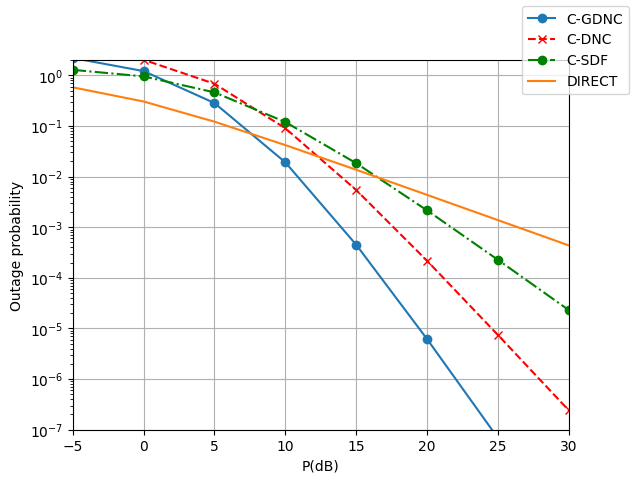

In [29]:
Pdb=np.arange(-5,31,5)
plt.semilogy(Pdb,Ogdnc, marker='o')
plt.semilogy(Pdb,Odnc,'rx--')
plt.semilogy(Pdb,Osdf1,'go-.')
plt.semilogy(Pdb,Odirect)
plt.grid()
plt.axis([-5,30,1e-7,2])
plt.xlabel('P(dB)')
plt.ylabel('Outage probability')
plt.figlegend(['C-GDNC','C-DNC','C-SDF', 'DIRECT'])
plt.show()